In [103]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from pathlib import Path
from scipy.ndimage import binary_dilation


np.set_printoptions(precision=4)

In [105]:
# ensure that you are in write path
!ls


 Assignment2.ipynb   'DIBR background.pdf'  'DIBR task.pdf'   Results
 combined_image.png   DIBR_data		     lib.ipynb


In [106]:
!pip install import_ipynb
import import_ipynb
%cd "drive/MyDrive/Assignment_2"
import lib

[Errno 2] No such file or directory: 'drive/MyDrive/Assignment_2'
/content/drive/MyDrive/Assignment_2


In [107]:
    # Znear and Zfar are nearest and fartheset points in the scene from the original camera
    Zfar = 2760.510889
    Znear = 34.506386

    # original Camera parameters
    # Original camera intrinsic matrix
    K_o = np.array([[1732.87 ,0.0 ,943.23], [0.0 ,1729.90 ,548.845040], [0, 0, 1]])
    # Original camera rotation matrix|translation vector
    Rt_o = np.array([[1.0 ,0.0 ,0.0,0.0 ], [ 0.0 ,1.0 ,0.0 ,0.0], [0.0 ,0.0 ,1.0 ,0.0]])

    # vriginal Camera parameters
    # Virtual camera intrinsic matrix
    K_v = np.array([[1732.87 ,0.0 ,943.23], [0.0 ,1729.90 ,548.845040], [0, 0, 1]])
    # Virtual camera rotation matrix|translation vector
    Rt_v =  np.array([[1.0 ,0.0 ,0.0,1.5924 ], [ 0.0 ,1.0 ,0.0 ,0.0], [0.0 ,0.0 ,1.0 ,0.0]])

    # Load the original image and depth map
    org_image_path="DIBR_data/V_original.png"
    org_depth_path="DIBR_data/D_original.png"
    V,D=load_image(org_image_path, org_depth_path)

    # integerbased value ranges D_original into the floating point geometrical distance map Z
    Z=depth_map_to_distance_map(D, Znear, Zfar)

    # Create an instance of the DIBR class
    Depth_Image_Based_Rendering = DIBR(V, Z, K_o, Rt_o, K_v, Rt_v)



In [108]:
# task1: Synthesize the virtual image
rendered_image=Depth_Image_Based_Rendering.render()

In [109]:
# Show task1 image
plot_images_in_list([rendered_image],1,1)

Output hidden; open in https://colab.research.google.com to view.

In [110]:
    #save task1 image
    directory="/Results/task1"
    imageList=[rendered_image]
    save_images(imageList,directory)

1 Images succesfully saved in: /Results/task1.


In [111]:
    #task2
    #render 5 virtual image  spread out on the line connecting the original and virtual camera centers
    N=5
    views=Depth_Image_Based_Rendering.render_virtual_views(N)

Rt_current: [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
The view number1 is rendered.
Rt_current: [[1.     0.     0.     0.3981]
 [0.     1.     0.     0.    ]
 [0.     0.     1.     0.    ]]
The view number2 is rendered.
Rt_current: [[1.     0.     0.     0.7962]
 [0.     1.     0.     0.    ]
 [0.     0.     1.     0.    ]]
The view number3 is rendered.
Rt_current: [[1.     0.     0.     1.1943]
 [0.     1.     0.     0.    ]
 [0.     0.     1.     0.    ]]
The view number4 is rendered.
Rt_current: [[1.     0.     0.     1.5924]
 [0.     1.     0.     0.    ]
 [0.     0.     1.     0.    ]]
The view number5 is rendered.


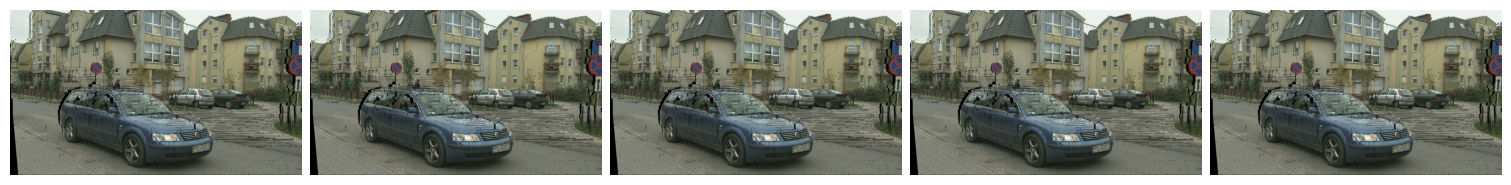

In [112]:
    # Show task2 images
    plot_images_in_list(views,1,N)

In [113]:
    # save 5 images of task2
    directory="Results/task2"
    imageList=views
    save_images(imageList,directory)

5 Images succesfully saved in: Results/task2.


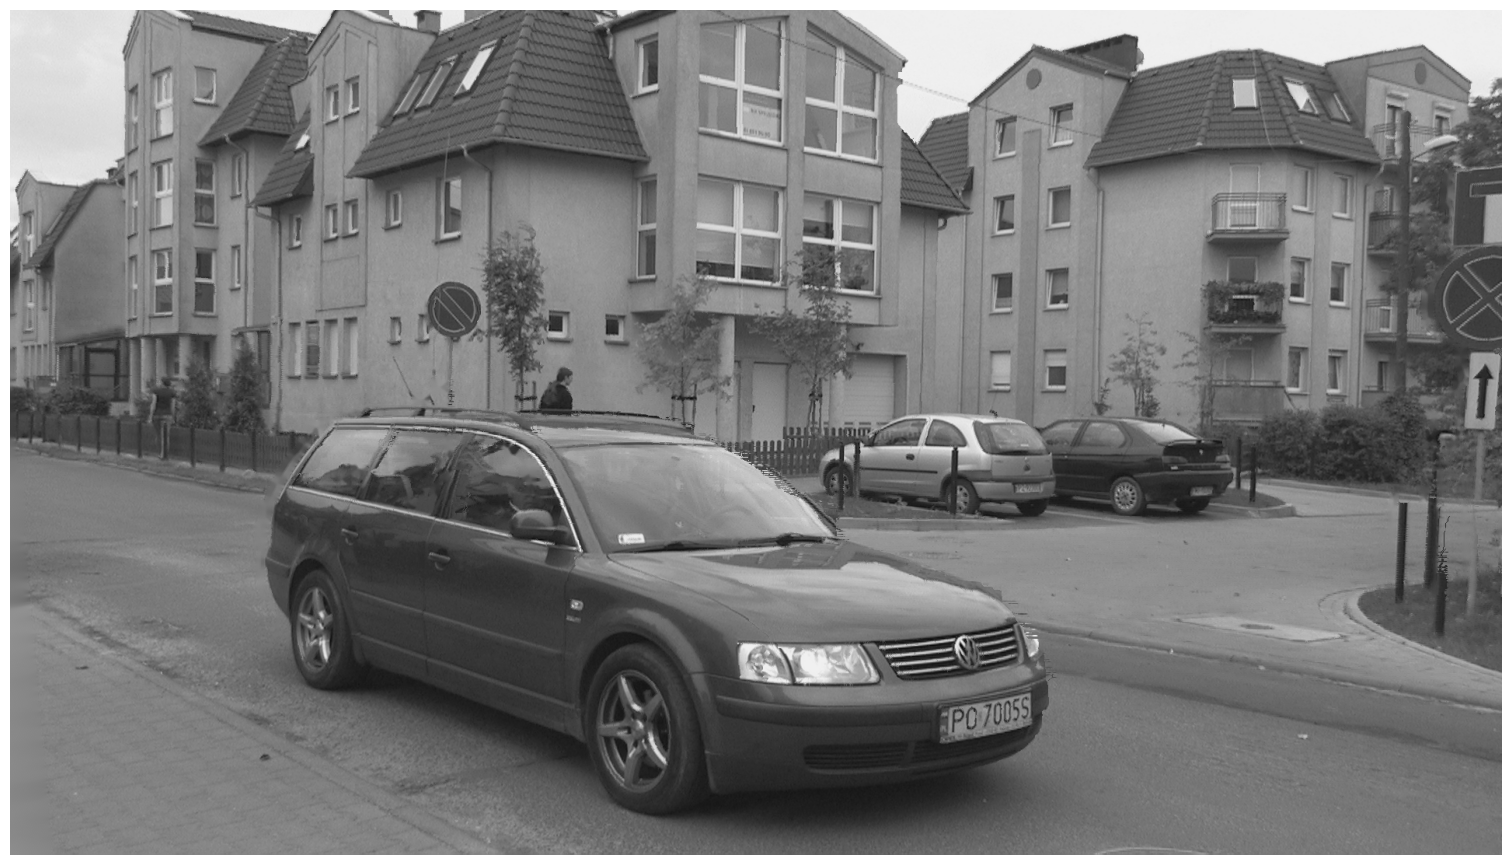

In [114]:
# task 3 fill cracks and disocclusions with cv2 TELEA inpainting
filled_image=fill_cracks_and_disocclusions(rendered_image)
# I couldn't succeed to return back virtual image colors :(
plot_images_in_list([filled_image],1,1)

In [115]:
    # save image of task3
    directory="Results/task3"
    imageList=[filled_image]
    save_images(imageList,directory)

1 Images succesfully saved in: Results/task3.
